In [1]:
# Imports
# !pip install torchinfo
import torch
import torch.nn.functional as F
import torch.utils.data as Data
from torchvision import datasets, transforms
from torchinfo import summary
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import random
import cv2
import Comparison_v2 as CM
import os
import DataSetting_v2 as DS

In [ ]:
%%html
<style>
.cell-output-ipywidget-background {
    background-color: transparent !important;
}
:root {
    --jp-widgets-color: var(--vscode-editor-foreground);
    --jp-widgets-font-size: var(--vscode-editor-font-size);
}  
</style>

### Test

In [2]:
datadir = f'../dataset/0509/make19_30-finished/'
data = DS.ModalityLoader(data_dir=datadir, mmap_mode='r', modalities={'rimg', 'tag'})
gt = data.profiling({'T03', 'T04'})

Loading from ../dataset/0509/make19_30-finished/


  0%|          | 0/10 [00:00<?, ?it/s]

Profiled by {'T03', 'T04'}


In [3]:
RP = CM.ResultProcess(subjects={'30Center': '../saved/240512_30C/240512_30C_Student_pred.npy'}, most_gt=gt, least_gt=gt)
RP.load_preds()

30Center loading...
30Center loaded Estimates of (5069, 128, 128) as float32


In [4]:
print(RP.subjects['30Center'])

In [5]:
RP.resize()
RP.matching_mae()

30Center reconstructing...Done
 Reconstruction finished. Failure count = 0
30Center calculating 2D correlation...Done!


<Figure size 432x288 with 0 Axes>

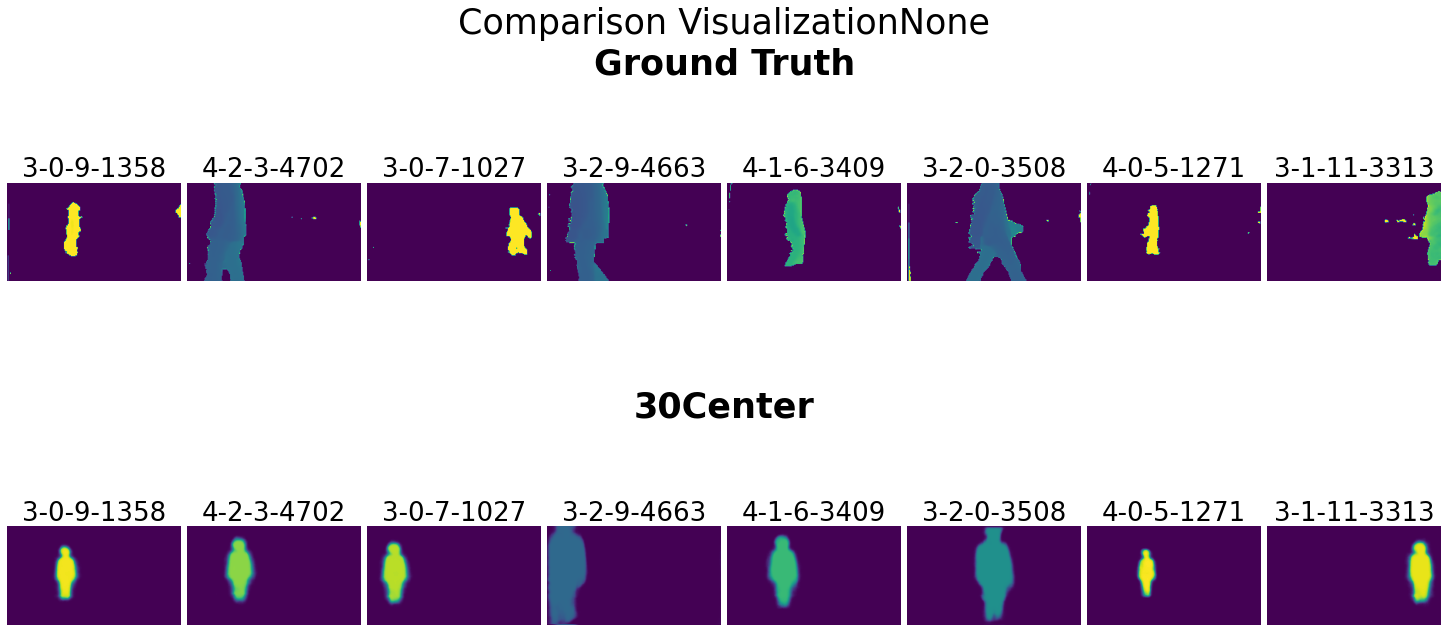

<Figure size 1440x720 with 0 Axes>

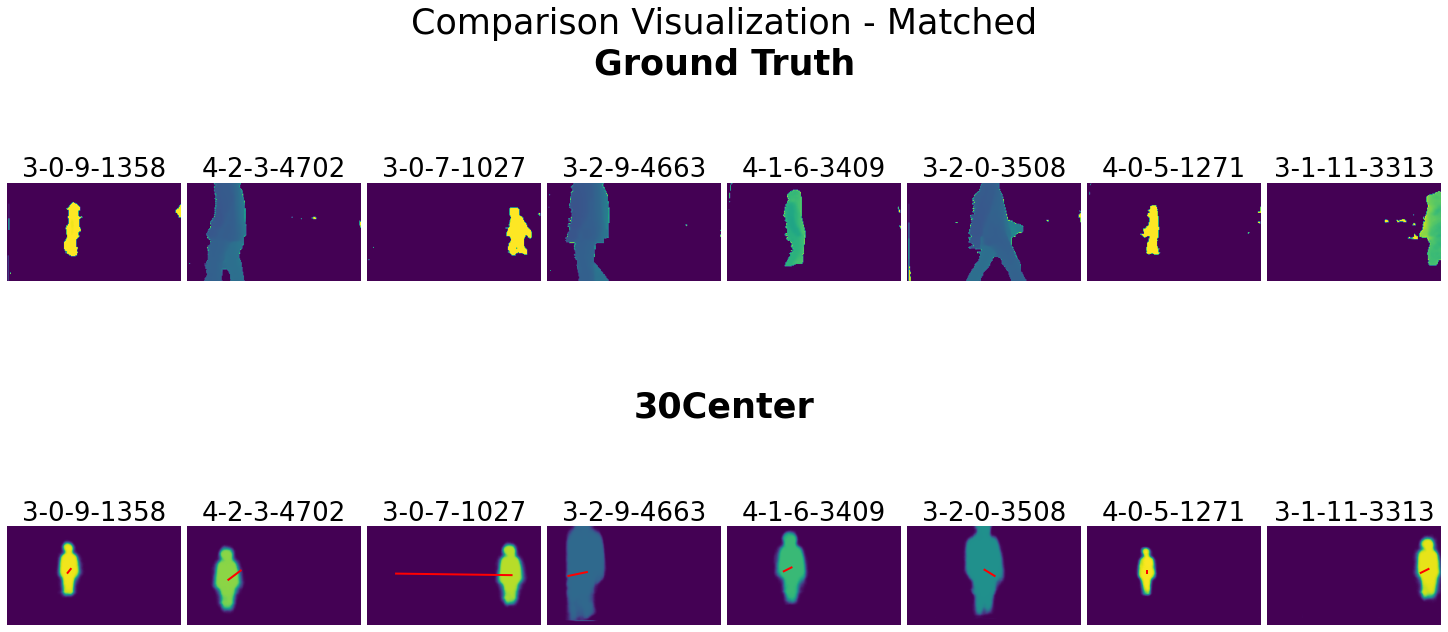

In [6]:
RP._visualization.inds=None
RP.visualize(matched=False)
RP.visualize(matched=True)

<Figure size 1440x720 with 0 Axes>

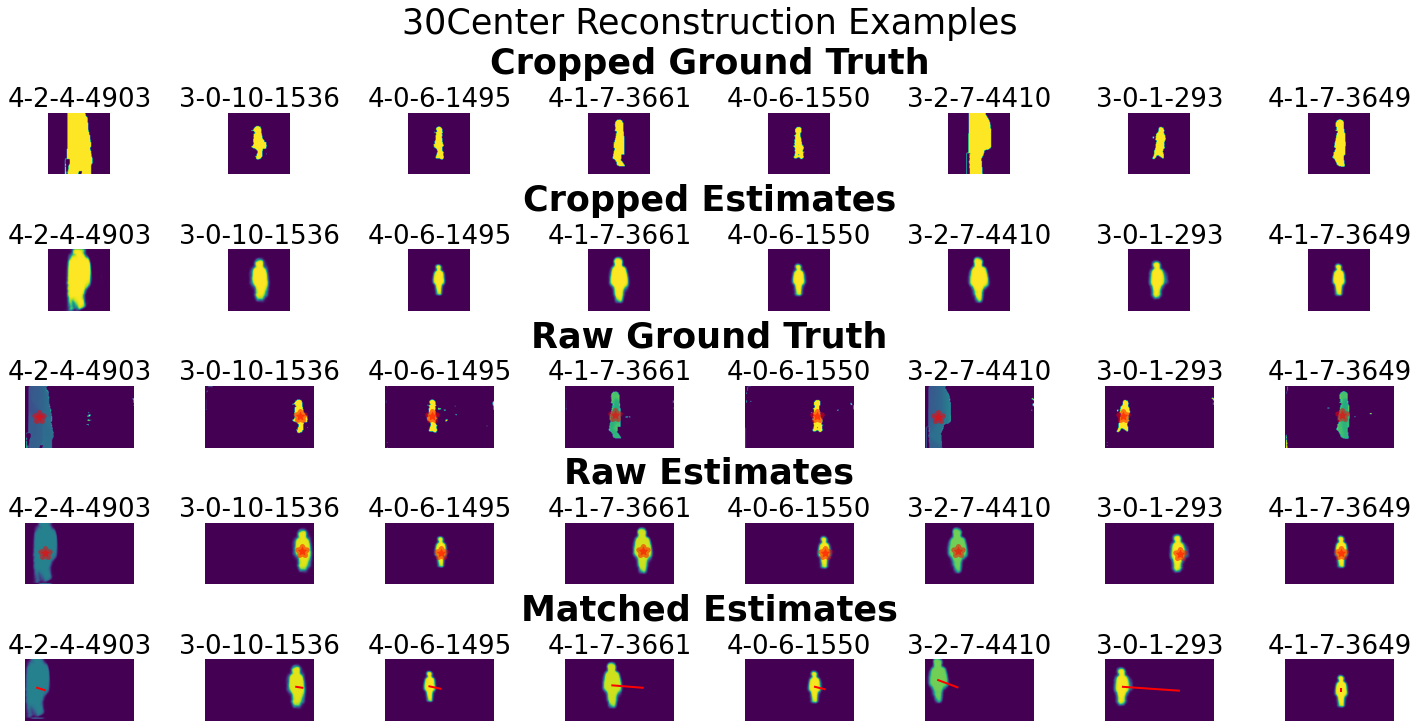

{'30Center_Reconstruct_Matched.jpg': <Figure size 1440x720 with 40 Axes>}

In [7]:
RP.subjects['30Center'].plot_example(matched=True)

### Comparison

In [2]:
most_datadir = f'../dataset/0509/make19_30-finished/'
most_data = DS.ModalityLoader(data_dir=most_datadir, mmap_mode='r', modalities={'rimg', 'tag'})
most_gt = most_data.profiling({'T03', 'T04'})

least_datadir = f'../dataset/0509/make19_300-finished/'
least_data = DS.ModalityLoader(data_dir=least_datadir, mmap_mode='r', modalities={'rimg', 'tag'})
least_gt = least_data.profiling({'T03', 'T04'})

Loading from ../dataset/0509/make19_30-finished/


  0%|          | 0/10 [00:00<?, ?it/s]

Profiled by {'T03', 'T04'}
Loading from ../dataset/0509/make19_300-finished/


  0%|          | 0/10 [00:00<?, ?it/s]

Profiled by {'T03', 'T04'}


In [3]:
subjects = {
    '30Center': '../saved/240512_30C/240512_30C_Student_pred.npy',
   '30BBX': '../saved/240512_30D/240512_30_Student_pred.npy',
   '100Center': '../saved/240512_100C/240512_100C_Student_pred.npy',
   '100BBX': '../saved/240512_100D/240512_100D_Student_pred.npy',
   '300Center': '../saved/240512_300C/240512_300C_Student_pred.npy',
   '300BBX': '../saved/240512_300D/240512_300D_Student_pred.npy',
   '30Zero': None,
   'Wi2Vi': '../saved/240523_Wi2Vi/Wi2Vi_pred.npy',
   'AE': '../saved/240523_AE_2/AE_pred.npy',
   'VAE': '../saved/240523_VAE/VAE_pred.npy',
   'TSAE': '../saved/240523TSAE/Student_pred.npy',
   'TSVAE': '../saved/240523TSVAE/Student_pred.npy'
}

In [4]:
RP = CM.ResultProcess(subjects=subjects, most_gt=most_gt, least_gt=least_gt)
RP.load_preds()

30Center loading...
30Center loaded Estimates of (5069, 128, 128) as float32
30BBX loading...
30BBX loaded Estimates of (5069, 128, 128) as float32
100Center loading...
100Center loaded Estimates of (4953, 128, 128) as float32
100BBX loading...
100BBX loaded Estimates of (4953, 128, 128) as float32
300Center loading...
300Center loaded Estimates of (4611, 128, 128) as float32
300BBX loading...
300BBX loaded Estimates of (4611, 128, 128) as float32
30Zero loading...
30Zero loaded Zero Estimates
Wi2Vi loading...
Wi2Vi loaded Estimates of (5069, 240, 320) as float32
AE loading...
AE loaded Estimates of (5069, 128, 128) as float32
VAE loading...
VAE loaded Estimates of (5069, 128, 128) as float32
TSAE loading...
TSAE loaded Estimates of (5069, 128, 128) as float32
TSVAE loading...
TSVAE loaded Estimates of (5069, 128, 128) as float32


In [5]:
RP.resize()
RP.calculate_loss()

30Center reconstructing...Done
 Reconstruction finished. Failure count = 0
30BBX reconstructing...Done
 Reconstruction finished. Failure count = 0
100Center reconstructing...Done
 Reconstruction finished. Failure count = 0
100BBX reconstructing...Done
 Reconstruction finished. Failure count = 0
300Center reconstructing...Done
 Reconstruction finished. Failure count = 0
300BBX reconstructing...Done
 Reconstruction finished. Failure count = 0
30Zero resized
Wi2Vi resizing...Done!
AE resizing...Done!
VAE resizing...Done!
TSAE resizing...Done!
TSVAE resizing...Done!
30Center calculating loss...

/home/bob/datastore/Models/Comparison_v2.py:75: UserWarning: Using a target size (torch.Size([1, 1, 128, 226])) that is different to the input size (torch.Size([128, 226])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  self.result[i] = F.mse_loss(pred, torch.from_numpy(self.gt[_ind][_take]))


Done
30BBX calculating loss...Done
100Center calculating loss...Done
100BBX calculating loss...Done
300Center calculating loss...Done
300BBX calculating loss...Done
30Zero calculating loss...Done
Wi2Vi calculating loss...Done
AE calculating loss...Done
VAE calculating loss...Done
TSAE calculating loss...Done
TSVAE calculating loss...Done


In [6]:
RP.matching_mae(scale=0.3)

30Center calculating 2D correlation...Done!
30BBX calculating 2D correlation...Done!
100Center calculating 2D correlation...Done!
100BBX calculating 2D correlation...Done!
300Center calculating 2D correlation...Done!
300BBX calculating 2D correlation...Done!
30Zero calculating 2D correlation...Done!
Wi2Vi calculating 2D correlation...Done!
AE calculating 2D correlation...Done!
VAE calculating 2D correlation...Done!
TSAE calculating 2D correlation...Done!
TSVAE calculating 2D correlation...Done!


<Figure size 432x288 with 0 Axes>

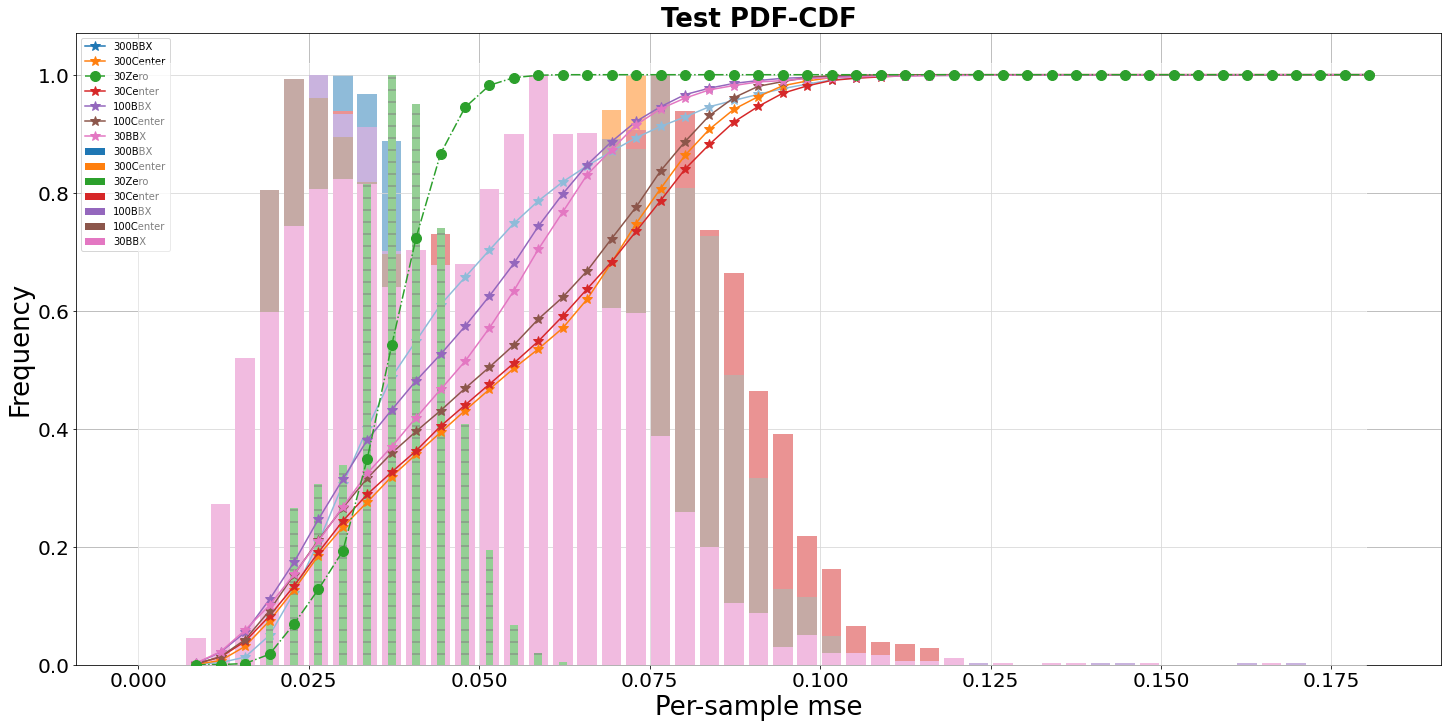

<Figure size 1440x720 with 0 Axes>

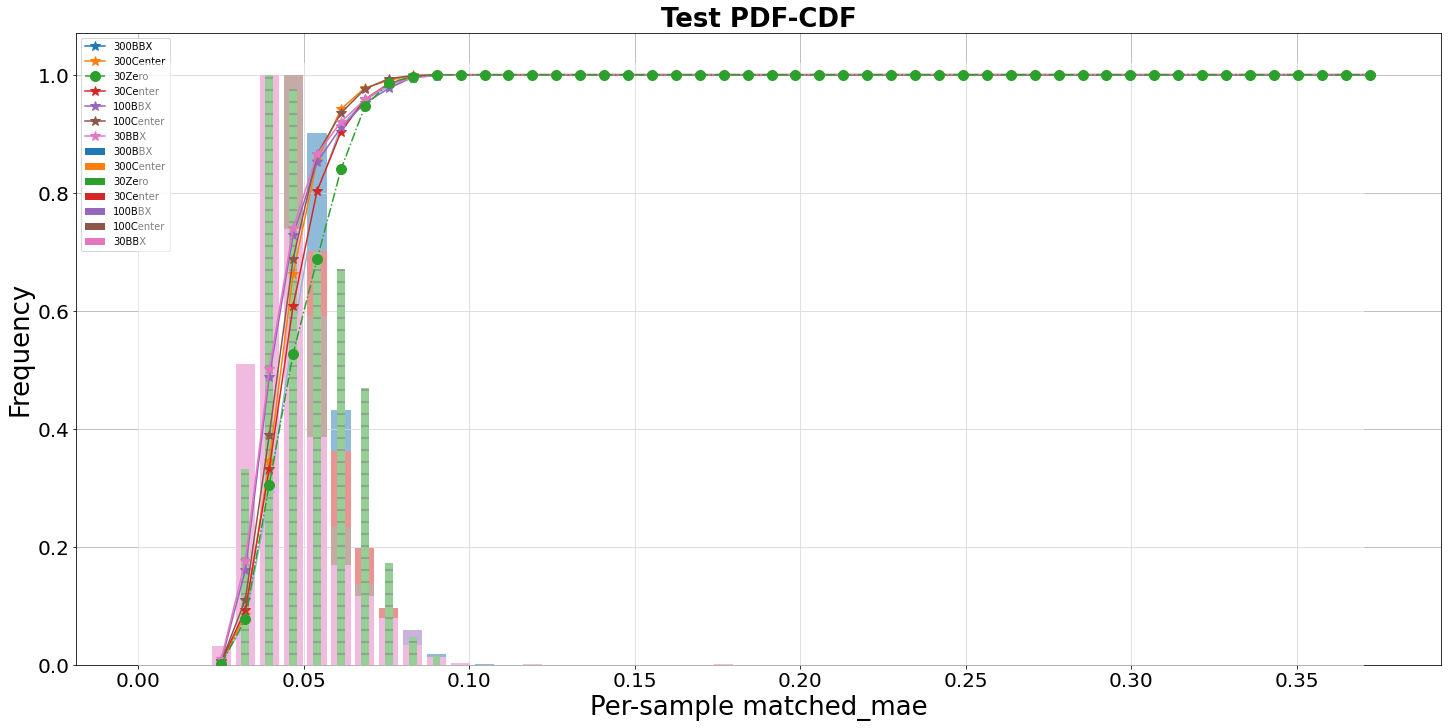

<Figure size 1440x720 with 0 Axes>

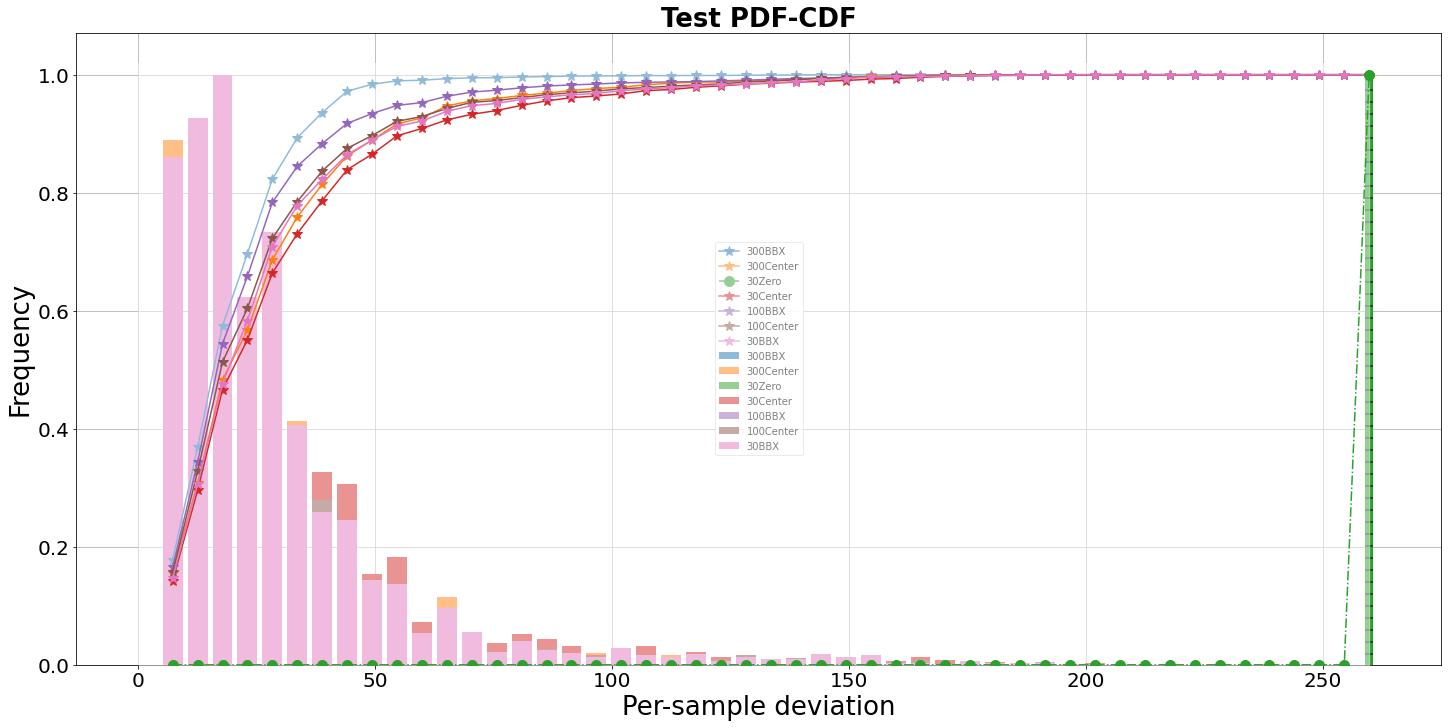

In [7]:
RP.gatherplot(scope={'30Center', '30BBX', '100Center', '100BBX', '300Center', '300BBX', '30Zero'}, item='mse')
RP.gatherplot(scope={'30Center', '30BBX', '100Center', '100BBX', '300Center', '300BBX', '30Zero'}, item='matched_mae')
RP.gatherplot(scope={'30Center', '30BBX', '100Center', '100BBX', '300Center', '300BBX', '30Zero'}, item='deviation')

<Figure size 1440x720 with 0 Axes>

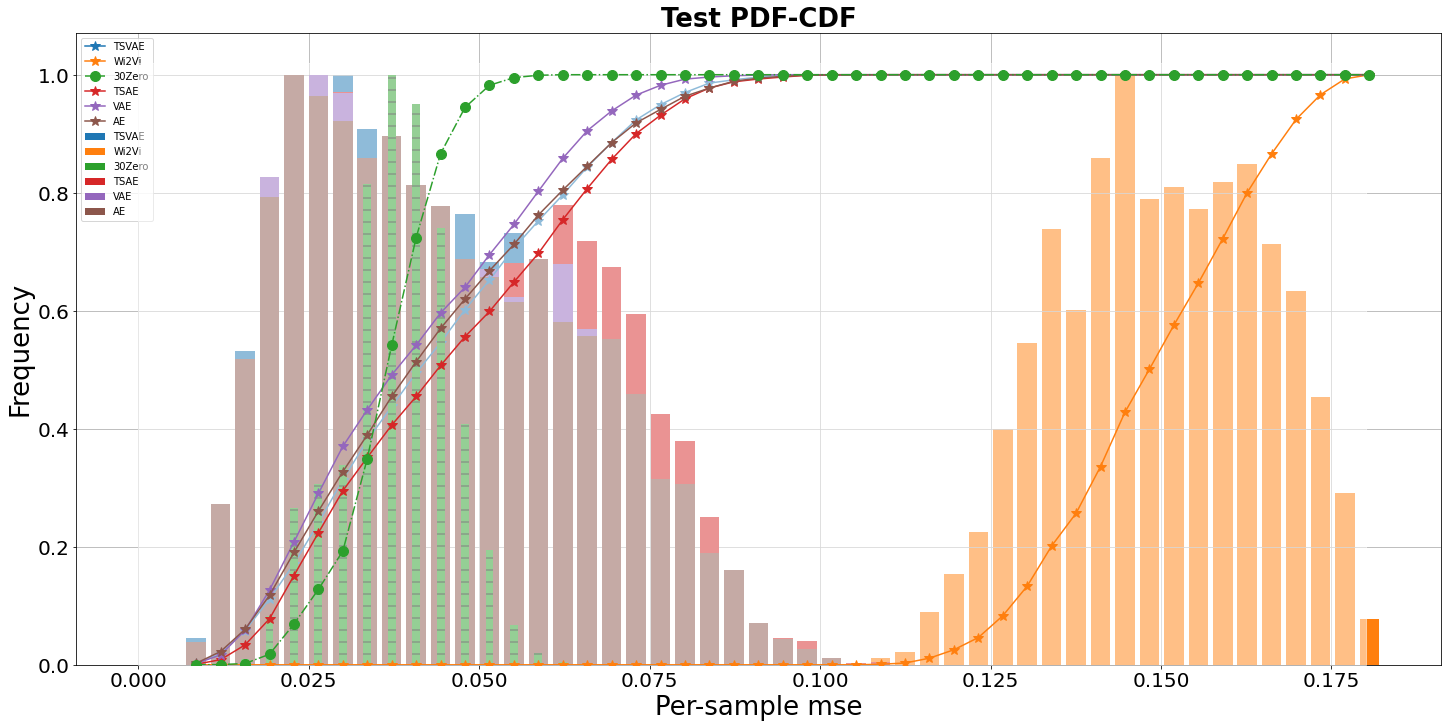

<Figure size 1440x720 with 0 Axes>

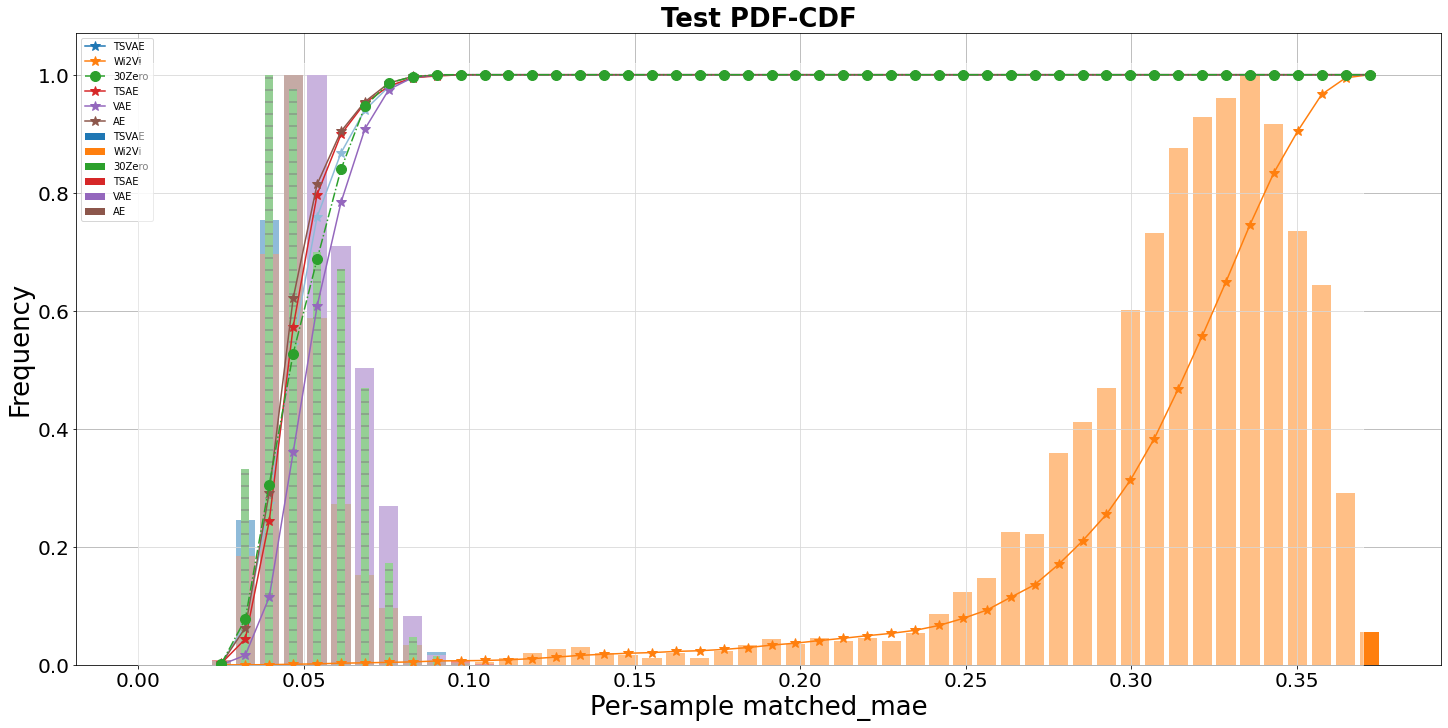

<Figure size 1440x720 with 0 Axes>

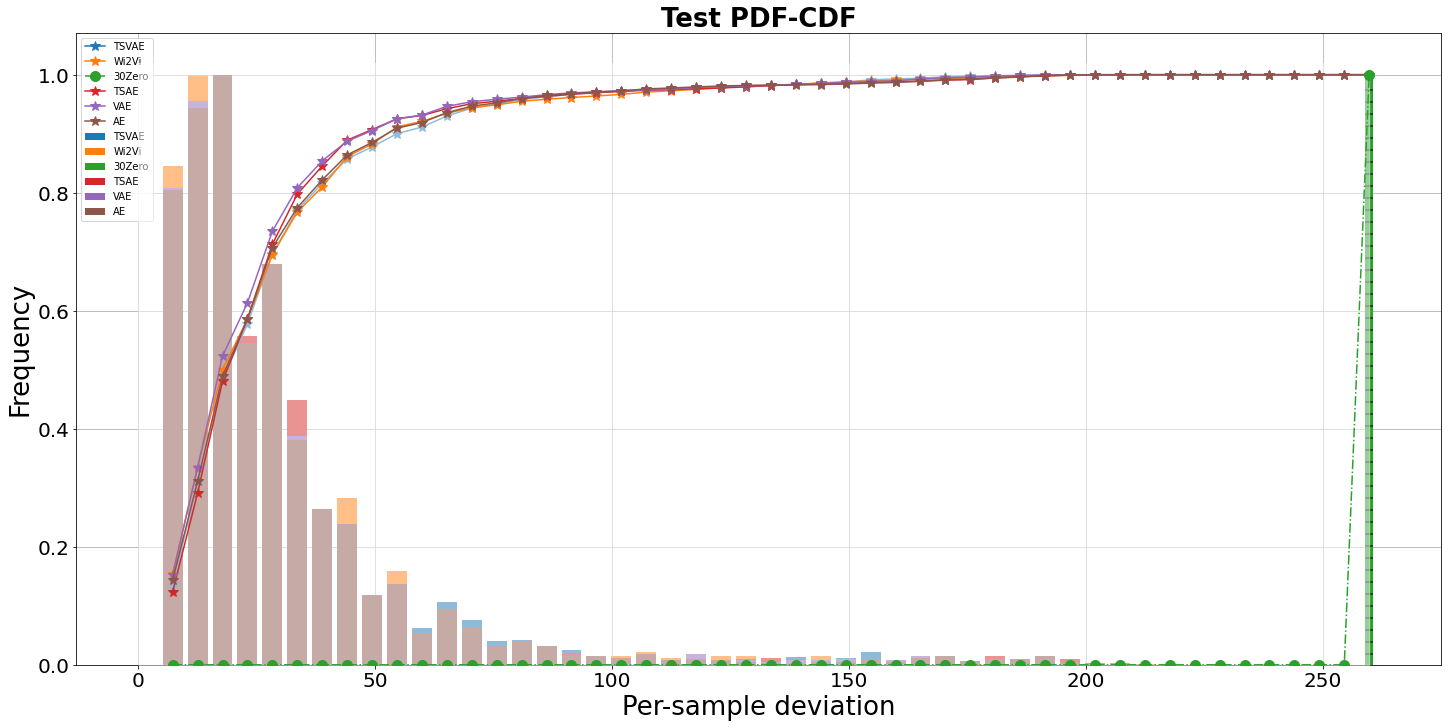

In [8]:
RP.gatherplot(scope={'30Zero', 'Wi2Vi', 'AE', 'VAE', 'TSAE', 'TSVAE'}, item='mse')
RP.gatherplot(scope={'30Zero', 'Wi2Vi', 'AE', 'VAE', 'TSAE', 'TSVAE'}, item='matched_mae')
RP.gatherplot(scope={'30Zero', 'Wi2Vi', 'AE', 'VAE', 'TSAE', 'TSVAE'}, item='deviation')

<Figure size 1440x720 with 0 Axes>

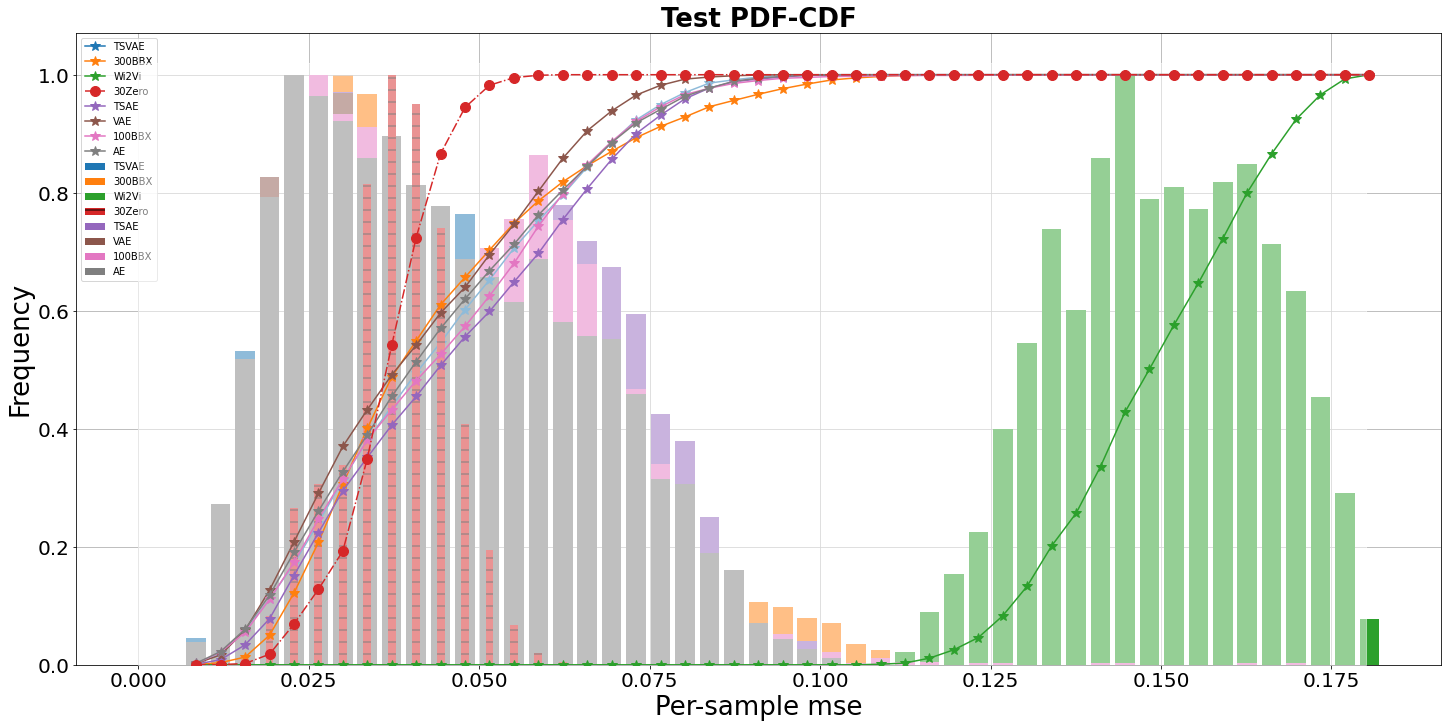

<Figure size 1440x720 with 0 Axes>

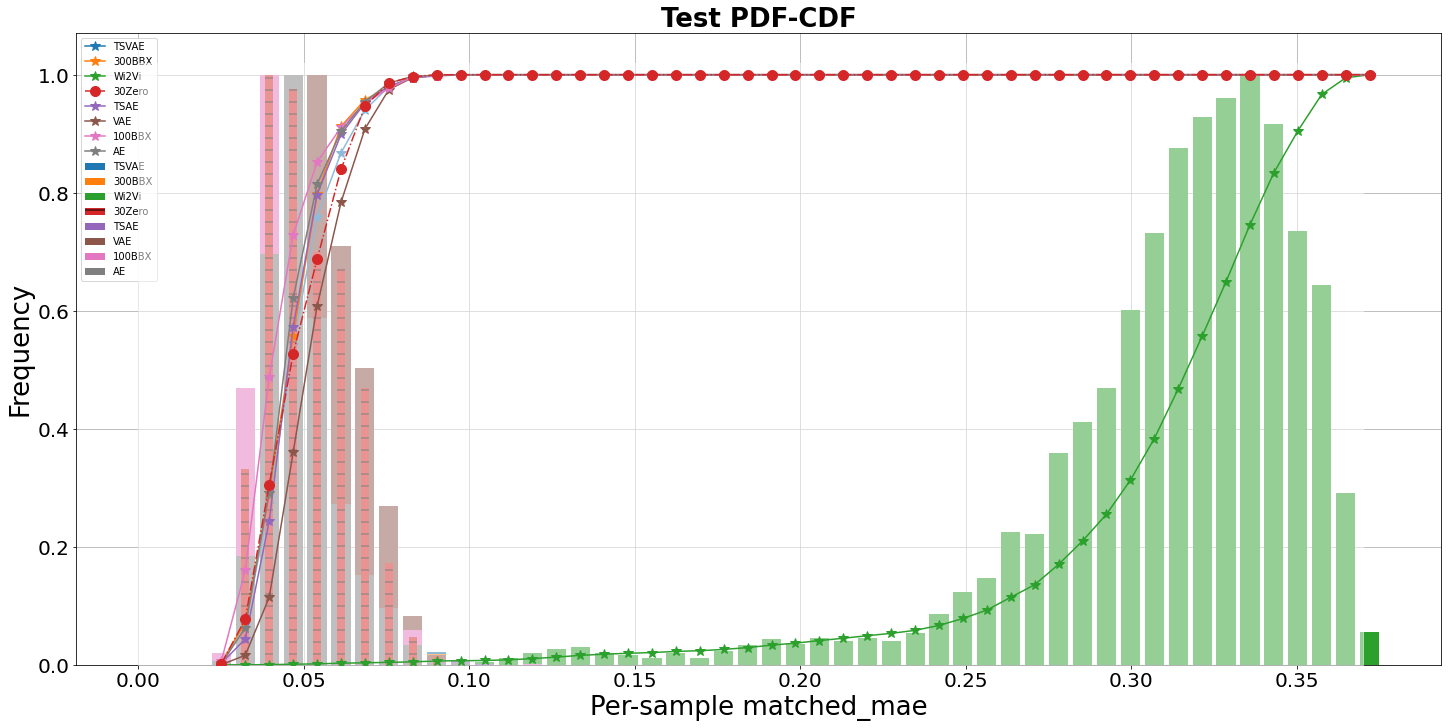

<Figure size 1440x720 with 0 Axes>

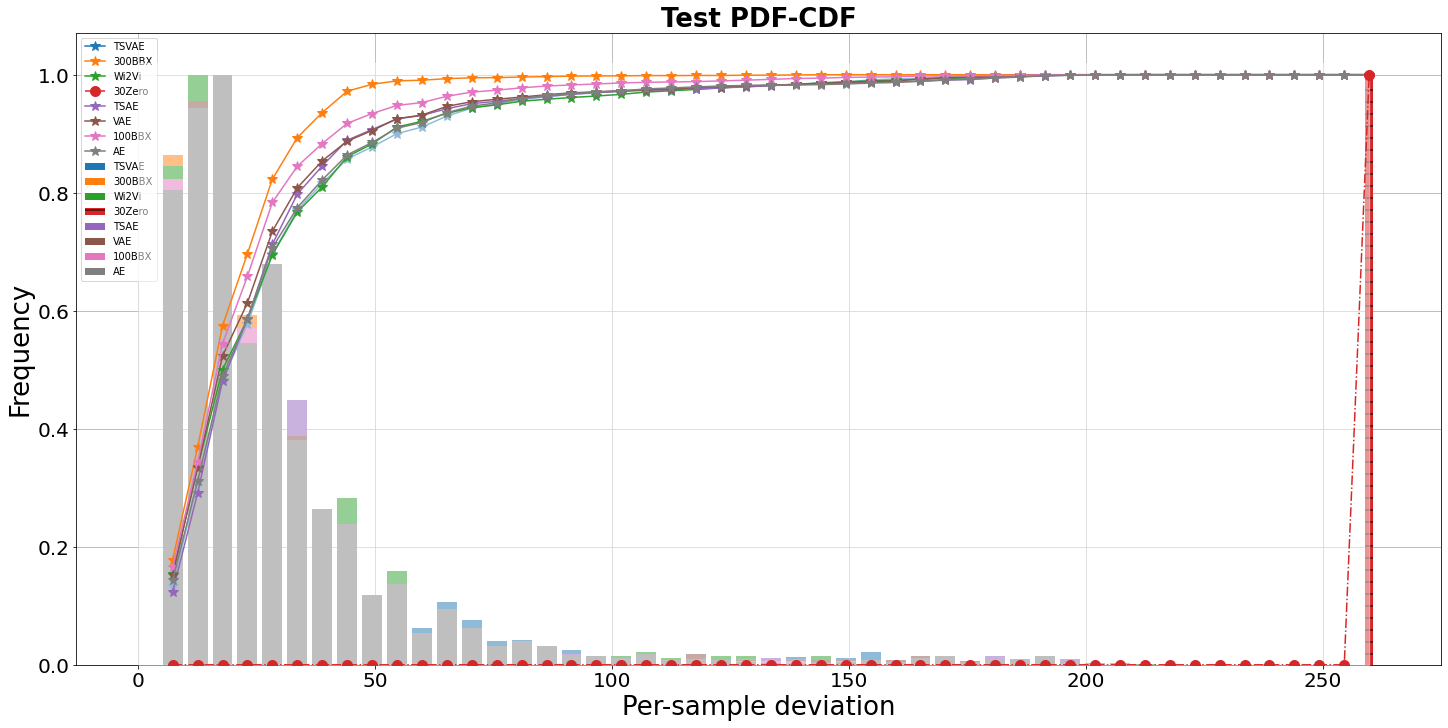

In [9]:
RP.gatherplot(scope={'30Zero', '100BBX', '300BBX', 'Wi2Vi', 'AE', 'VAE', 'TSAE', 'TSVAE'}, item='mse')
RP.gatherplot(scope={'30Zero', '100BBX', '300BBX', 'Wi2Vi', 'AE', 'VAE', 'TSAE', 'TSVAE'}, item='matched_mae')
RP.gatherplot(scope={'30Zero', '100BBX', '300BBX', 'Wi2Vi', 'AE', 'VAE', 'TSAE', 'TSVAE'}, item='deviation')

<Figure size 1440x1440 with 0 Axes>

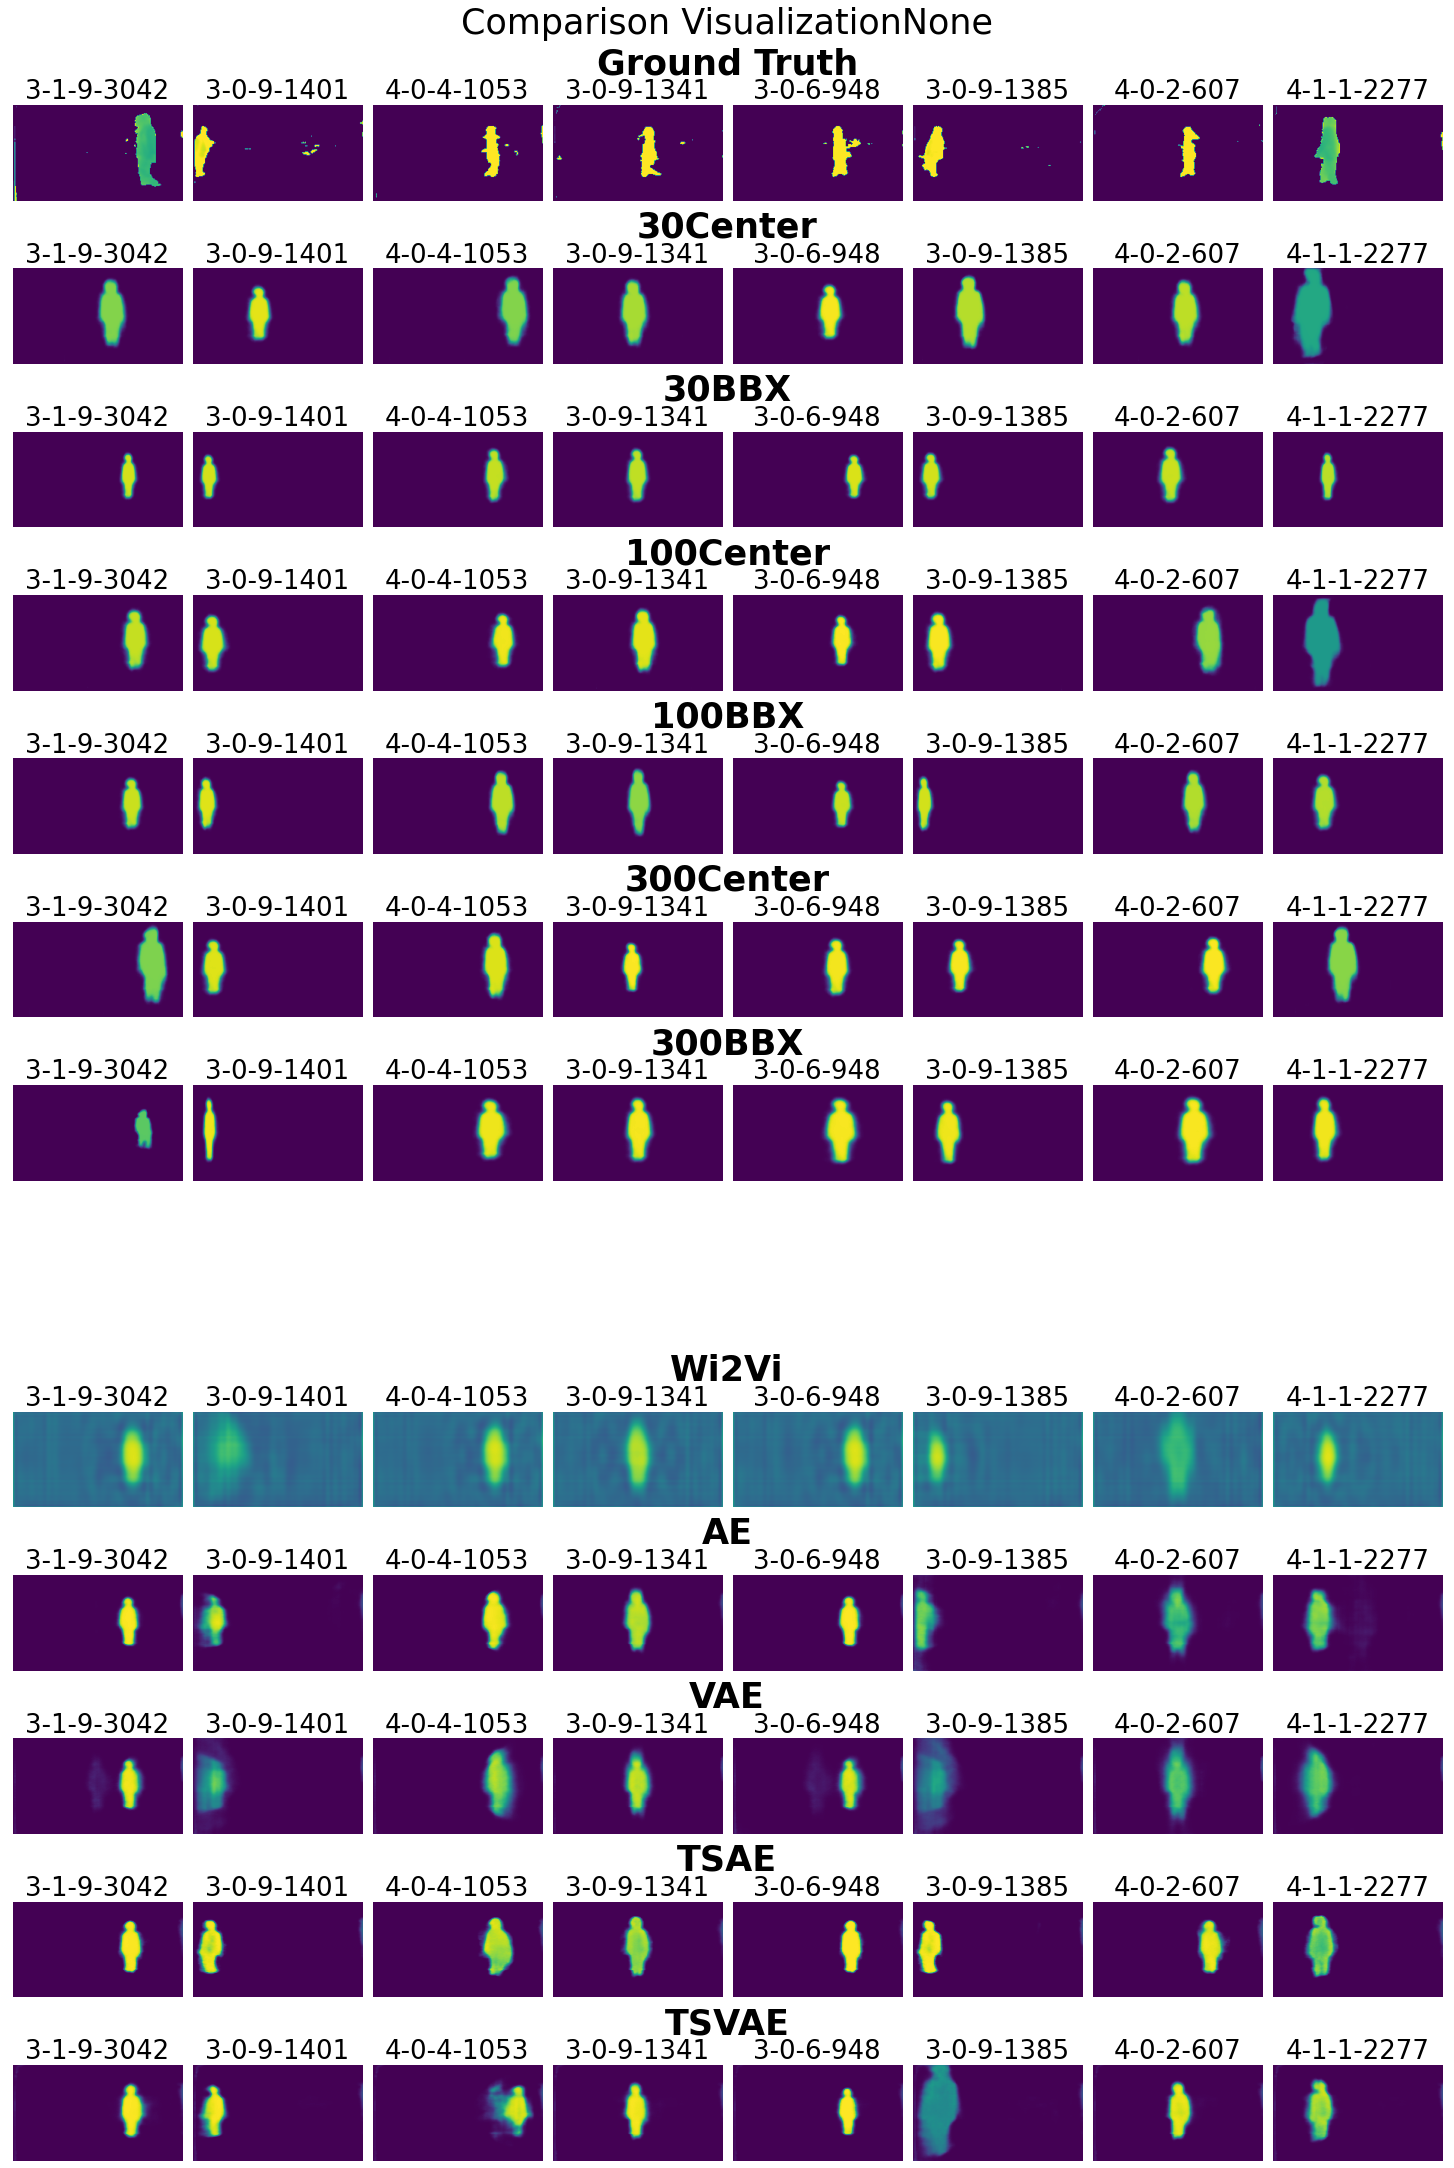

<Figure size 1440x2160 with 0 Axes>

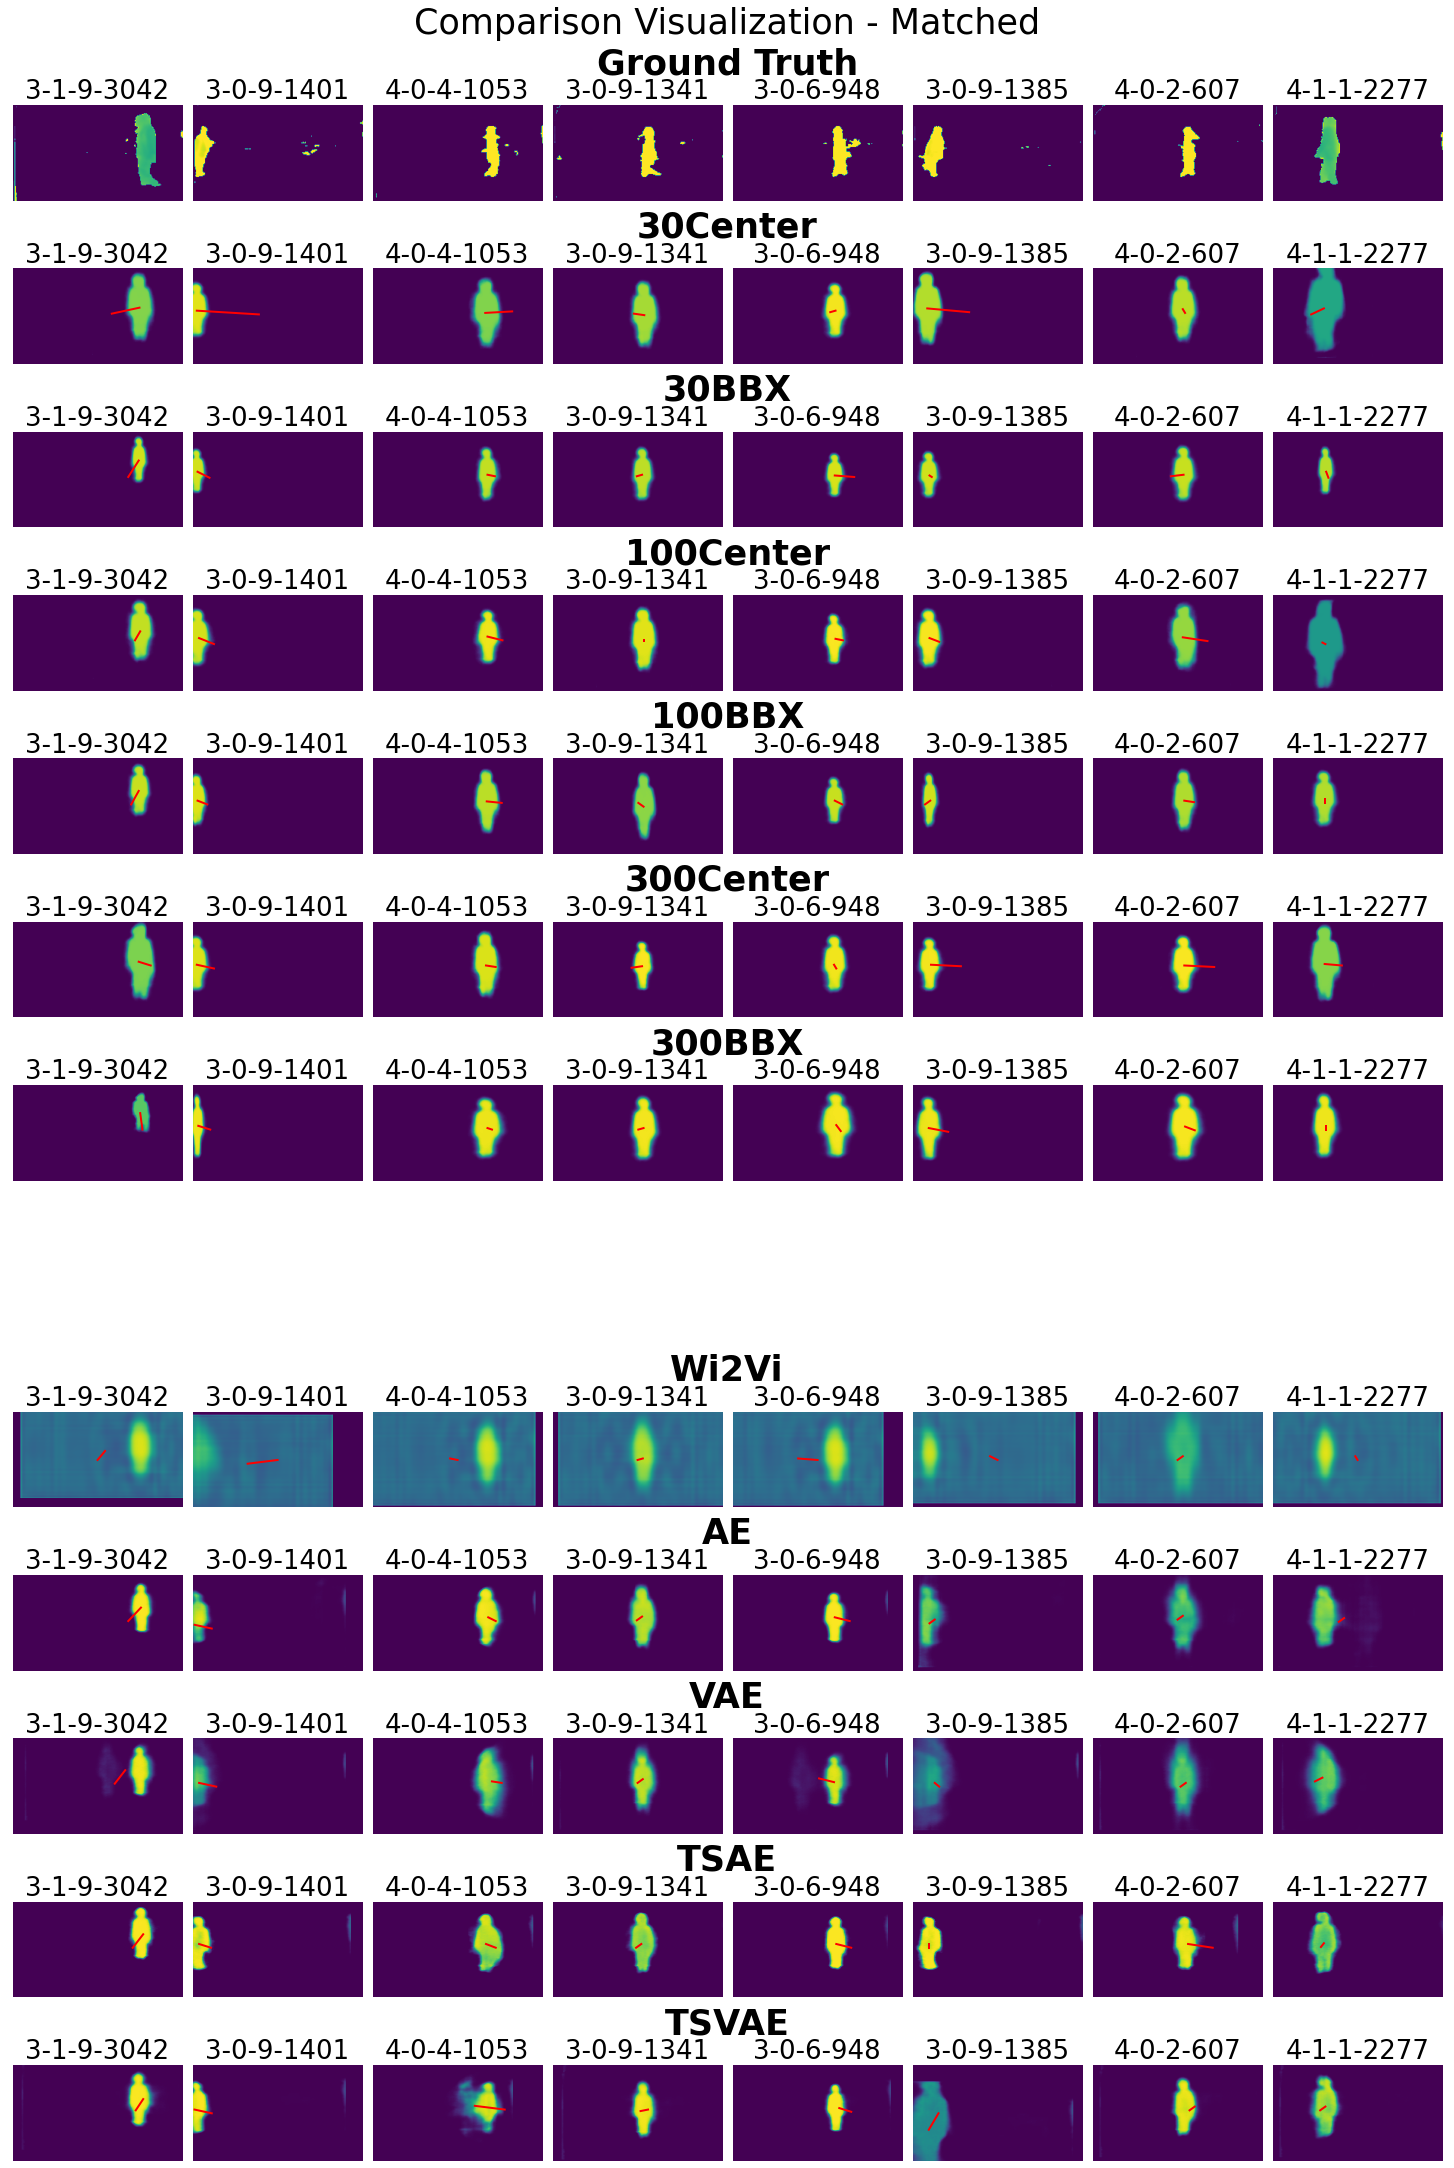

In [13]:
RP._visualization.figsize = (20, 30)
RP.visualize(matched=False)
RP.visualize(matched=True)

In [14]:
import os
notion = '240528Comp1'
save_path = f'../saved/{notion}/'
if not os.path.exists(save_path):
    os.makedirs(save_path)
for filename, fig in RP.figs.items():
    fig.savefig(f"{save_path}{filename}")

In [18]:
print(RP.subjects['30Center'].depth[:10])

[0.94217014 0.5559635  0.5506778  0.98010224 0.8819091  0.74590325
 0.99912316 0.99517447 0.88549757 0.8907828 ]


In [ ]:
RP.subjects['30Center'].plot_example()